# Atividades

## Analisando dados de ocorrências de feminicídio na cidade de São Paulo

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os índices de feminicídio evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais foram os períodos com maiores taxas nos últimos anos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices?
- Quais são os dias da semana, horários com maiores índices?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

#### Os arquivos baixados estão na pasta DATA.
Foram baixados os arquivos referentes de junho de 2017 até junho de 2019

# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# preprocessamento dos arquivos que possuem o antigo formato exel

Foi necessário usar o libre office para abrir todas as planilhas e salvar elas como xlsx

# Leitura e Análise superficial dos dados

In [ ]:
path = "../datasets/BO_feminicidio_SP/" # Ainda bem que criei o CSV
data = []
for file in os.listdir(path=path):
    if(file.split('.')[1] != 'csv'):
        data.append(pd.read_excel(path + file))
xlsx = pd.concat(data)
xlsx

### Salvando os dados para um CSV

In [2]:
# xlsx.to_csv("../datasets/BO_feminicidio_SP/2017_06_2019_06.csv")

In [3]:
df = pd.read_csv("../datasets/BO_feminicidio_SP/2017_06_2019_06.csv")
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,DE MADRUGADA,03/10/2018,03/10/2018 06:26:40,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,DE MADRUGADA,03/10/2018,03/10/2018 06:26:40,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,DE MADRUGADA,03/10/2018,03/10/2018 06:26:40,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,DE MADRUGADA,03/10/2018,03/10/2018 06:26:40,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2018,7833,7833/2018,03/10/2018 14:43:45,03/10/2018 18:38:08,03/10/2018,PELA MANHÃ,03/10/2018,03/10/2018 14:43:45,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
5,2018,7833,7833/2018,03/10/2018 14:43:45,03/10/2018 18:38:08,03/10/2018,PELA MANHÃ,03/10/2018,03/10/2018 14:43:45,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
6,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,A NOITE,03/10/2018,03/10/2018 21:59:42,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
7,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,A NOITE,03/10/2018,03/10/2018 21:59:42,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
8,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,A NOITE,03/10/2018,03/10/2018 21:59:42,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
9,2018,2728,2728/2018,06/10/2018 11:06:48,06/10/2018 15:12:42,06/10/2018,PELA MANHÃ,06/10/2018,06/10/2018 11:06:48,Conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 56 columns):
ANO_BO                      648 non-null int64
NUM_BO                      648 non-null int64
NUMERO_BOLETIM              648 non-null object
BO_INICIADO                 648 non-null object
BO_EMITIDO                  648 non-null object
DATAOCORRENCIA              648 non-null object
PERIDOOCORRENCIA            648 non-null object
DATACOMUNICACAO             648 non-null object
DATAELABORACAO              648 non-null object
BO_AUTORIA                  648 non-null object
FLAGRANTE                   648 non-null object
NUMERO_BOLETIM_PRINCIPAL    101 non-null object
LOGRADOURO                  183 non-null object
NUMERO                      646 non-null float64
BAIRRO                      632 non-null object
CIDADE                      646 non-null object
UF                          646 non-null object
LATITUDE                    183 non-null float64
LONGITUDE                   183

In [5]:
df.describe()

,ANO_BO,NUM_BO,NUMERO,LATITUDE,LONGITUDE,RG,IDADE,PARENTESCO,ANO_FABRICACAO,ANO_MODELO,QUANT_CELULAR,MARCA_CELULAR
count,648.000000,648.000000,646.000000,183.000000,183.000000,5.610000e+02,570.000000,0.0,648.000000,648.000000,0.0,0.0
mean,2017.964506,2883.969136,182.622291,-22.951339,-47.155354,3.717931e+07,37.280702,NaN,9.239198,9.239198,NaN,NaN
std,0.748191,3509.797386,638.593704,0.892119,1.041378,1.410837e+07,14.604757,NaN,135.582537,135.582537,NaN,NaN
min,2017.000000,12.000000,0.000000,-23.990048,-51.835561,1.303945e+06,3.000000,NaN,0.000000,0.000000,NaN,NaN
25%,2017.000000,670.250000,0.000000,-23.550618,-47.457085,2.797321e+07,27.250000,NaN,0.000000,0.000000,NaN,NaN
50%,2018.000000,1700.500000,0.000000,-23.398443,-46.807285,3.859978e+07,35.000000,NaN,0.000000,0.000000,NaN,NaN
75%,2019.000000,4002.000000,0.000000,-22.727597,-46.526861,4.694410e+07,44.000000,NaN,0.000000,0.000000,NaN,NaN
max,2019.000000,29551.000000,4999.000000,-20.316348,-45.056774,9.573365e+07,85.000000,NaN,2019.000000,2019.000000,NaN,NaN


## Pré-processamento

Antes de analisar, caso necessário, realiza um procedimento de limpeza de dados, como remover duplicados, tratar strings, converter dados para outros formatos, criar novas colunas como dia do mês, da semana e mês.

**P.S.**: *Essa pode ser a fase mais demorada de todo o desafio.*

### Análisando os dados.
- A coluna **NUMERO_BOLETIM** é só a junção das colunas **NUM_BO** e **ANO_BO** seperando com uma **/**. Existem o mesmo numero de boletim para datas diferentes, portanto, o **NUMERO_BOLETIM** está sendo considerado a chave
- Podemos perceber que mesmo para um intervalo grande, existem muitas colunas com pouquissímos valores não nulos, acredito que estes dados não sirvam para a análise
    1. PARENTESCO                  0 non-null float64
    - PLACA_VEICULO               3 non-null object
    - UF_VEICULO                  3 non-null object
    - CIDADE_VEICULO              3 non-null object
    - DESCR_COR_VEICULO           3 non-null object
    - DESCR_MARCA_VEICULO         3 non-null object
    - DESCR_TIPO_VEICULO          3 non-null object
    - QUANT_CELULAR               0 non-null float64
    - MARCA_CELULAR               0 non-null float64
- Outras colunas que possuem muitos valores 0
    1. ANO_FABRICACAO             3 non-null int8
    - ANO_MODELO                  3 non-null int8

### Minusculizando as strings

In [6]:
for col in df:
    if(df[col].dtype == 'object'):
        df[col] = df[col].str.lower()
df

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,de madrugada,03/10/2018,03/10/2018 06:26:40,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,de madrugada,03/10/2018,03/10/2018 06:26:40,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,de madrugada,03/10/2018,03/10/2018 06:26:40,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,2018,2842,2842/2018,03/10/2018 06:26:40,03/10/2018 07:14:43,03/10/2018,de madrugada,03/10/2018,03/10/2018 06:26:40,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,2018,7833,7833/2018,03/10/2018 14:43:45,03/10/2018 18:38:08,03/10/2018,pela manhã,03/10/2018,03/10/2018 14:43:45,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
5,2018,7833,7833/2018,03/10/2018 14:43:45,03/10/2018 18:38:08,03/10/2018,pela manhã,03/10/2018,03/10/2018 14:43:45,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
6,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,a noite,03/10/2018,03/10/2018 21:59:42,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
7,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,a noite,03/10/2018,03/10/2018 21:59:42,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
8,2018,3312,3312/2018,03/10/2018 21:59:42,04/10/2018 03:02:12,03/10/2018,a noite,03/10/2018,03/10/2018 21:59:42,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
9,2018,2728,2728/2018,06/10/2018 11:06:48,06/10/2018 15:12:42,06/10/2018,pela manhã,06/10/2018,06/10/2018 11:06:48,conhecida,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


### Transformando os dados Temporais no tipo apropriado.

In [7]:
df['BO_INICIADO'] = pd.to_datetime(df['BO_INICIADO']) 
df['BO_EMITIDO'] = pd.to_datetime(df['BO_EMITIDO'])
df['DATAOCORRENCIA'] = pd.to_datetime(df['DATAOCORRENCIA'])
df['DATACOMUNICACAO'] = pd.to_datetime(df['DATACOMUNICACAO'])
df['DATAELABORACAO'] = pd.to_datetime(df['DATAELABORACAO'])
df['DATANASCIMENTO'] = pd.to_datetime(df['DATANASCIMENTO'])

### Segundo as informações abaixo houve 263 feminicídios se formos levar em consideração o **NUMERO_BO** como chave, logo farei produzirei um DataFrame onde os valores de Numero_BO não estão duplicados.

In [8]:
df.groupby('NUMERO_BOLETIM').size()

NUMERO_BOLETIM
1024/2017     4
1024/2019     1
10338/2017    2
10379/2017    3
10514/2018    3
1063/2019     1
1078/2019     7
1080/2018     3
1084/2018     2
1098/2018     3
1109/2019     2
11141/2018    1
1118/2018     1
1123/2019     2
115/2018      5
117/2018      1
1179/2018     1
12/2018       2
1247/2019     3
1267/2017     1
1290/2018     4
1295/2018     1
1296/2018     5
13/2019       2
1308/2019     1
1329/2019     1
134/2019      2
1362/2018     1
1363/2018     2
139/2019      2
             ..
779/2017      2
7833/2018     2
807/2018      1
819/2019      2
8210/2017     3
8389/2017     3
847/2017      4
861/2018      4
8662/2018     3
8670/2018     2
87/2018       1
8728/2018     1
882/2018      2
89/2019       4
892/2019      2
900/2019      1
911/2017      1
9123/2017     5
914/2018      3
919/2017      4
927/2017      3
928/2018      1
93/2019       2
935/2018      1
9548/2018     1
9606/2018     3
9693/2018     1
974/2019      3
98/2018       1
9959/2019     1
Length: 2

In [9]:
dfNumBo = df.drop_duplicates(subset='NUMERO_BOLETIM', keep='first')

## Análise Exploratória

Agora é a hora de descobrir relações e algumas *hidden informations* do dataset. 

#### Número de feminicidios de acordo com a idade

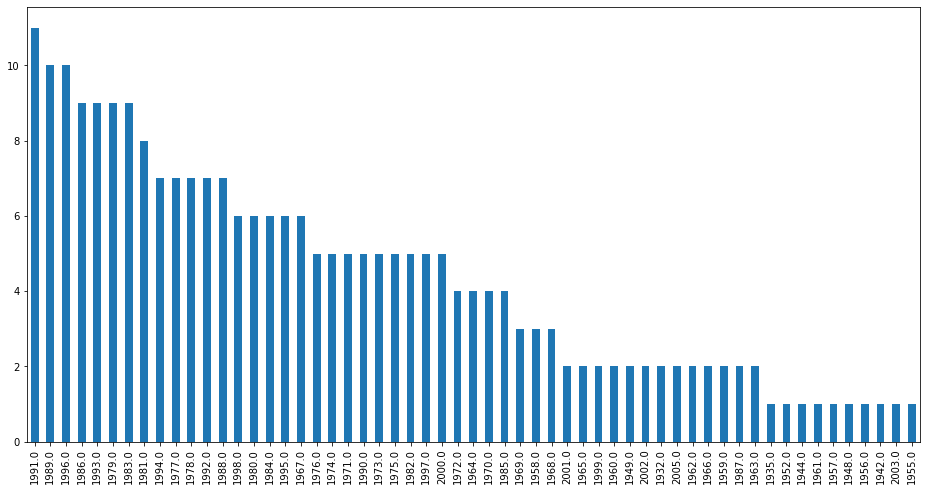

In [21]:
dfNumBo['DATANASCIMENTO'].dt.year.value_counts().plot(kind='bar', figsize=(16, 8));

#### Número de feminicídios por ANO

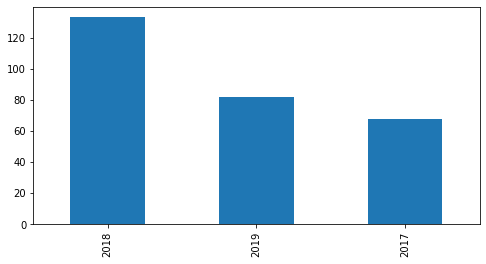

In [17]:
dfNumBo['ANO_BO'].value_counts().plot(kind='bar', figsize=(8, 4));

In [22]:
#### Número de feminicídios por ANO e mês

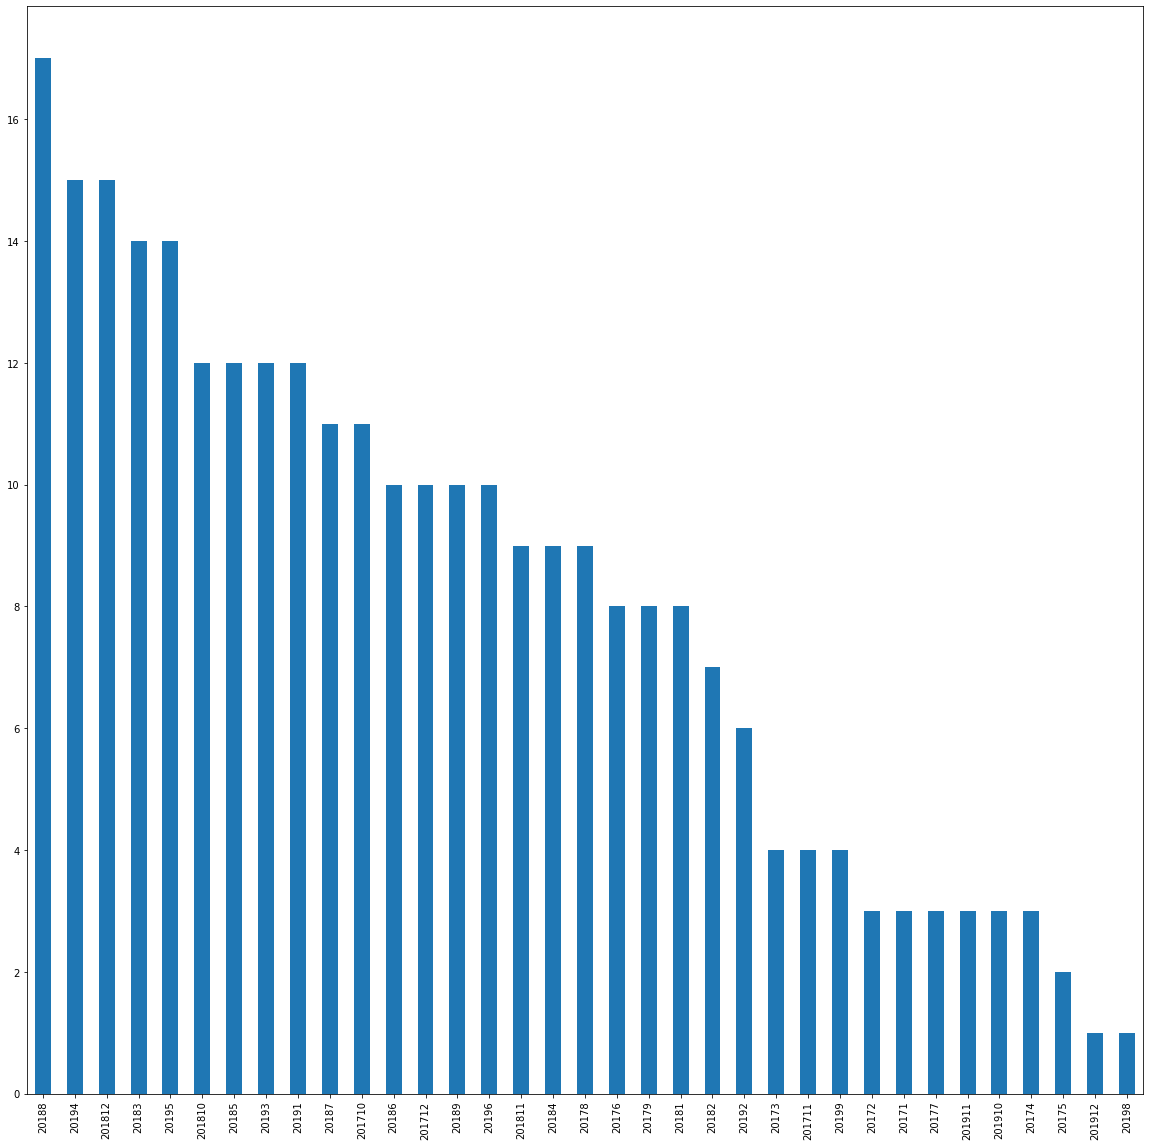

In [50]:
dfdate = pd.DataFrame()
dfdate['year'], dfdate['month'] = dfNumBo['DATAOCORRENCIA'].dt.year.astype('str'), dfNumBo['DATAOCORRENCIA'].dt.month.astype('str')
dfdate['yearmonth'] = dfdate[['year', 'month']].apply(lambda x: ''.join(x), axis=1)
dfdate['yearmonth'].value_counts().plot(kind='bar', figsize=(20, 20));

#### Número de feminicídios de acordo com o nível de instrução

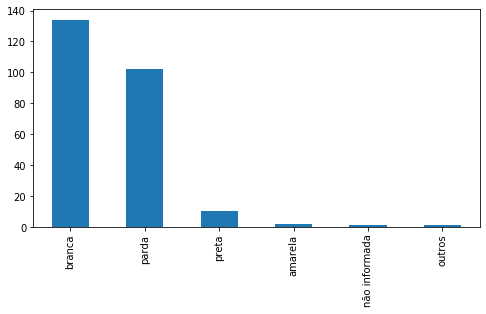

In [12]:
dfNumBo['CORCUTIS'].value_counts()[:10].plot(kind='bar', figsize=(8, 4));

#### Número de feminicídios por Cidade

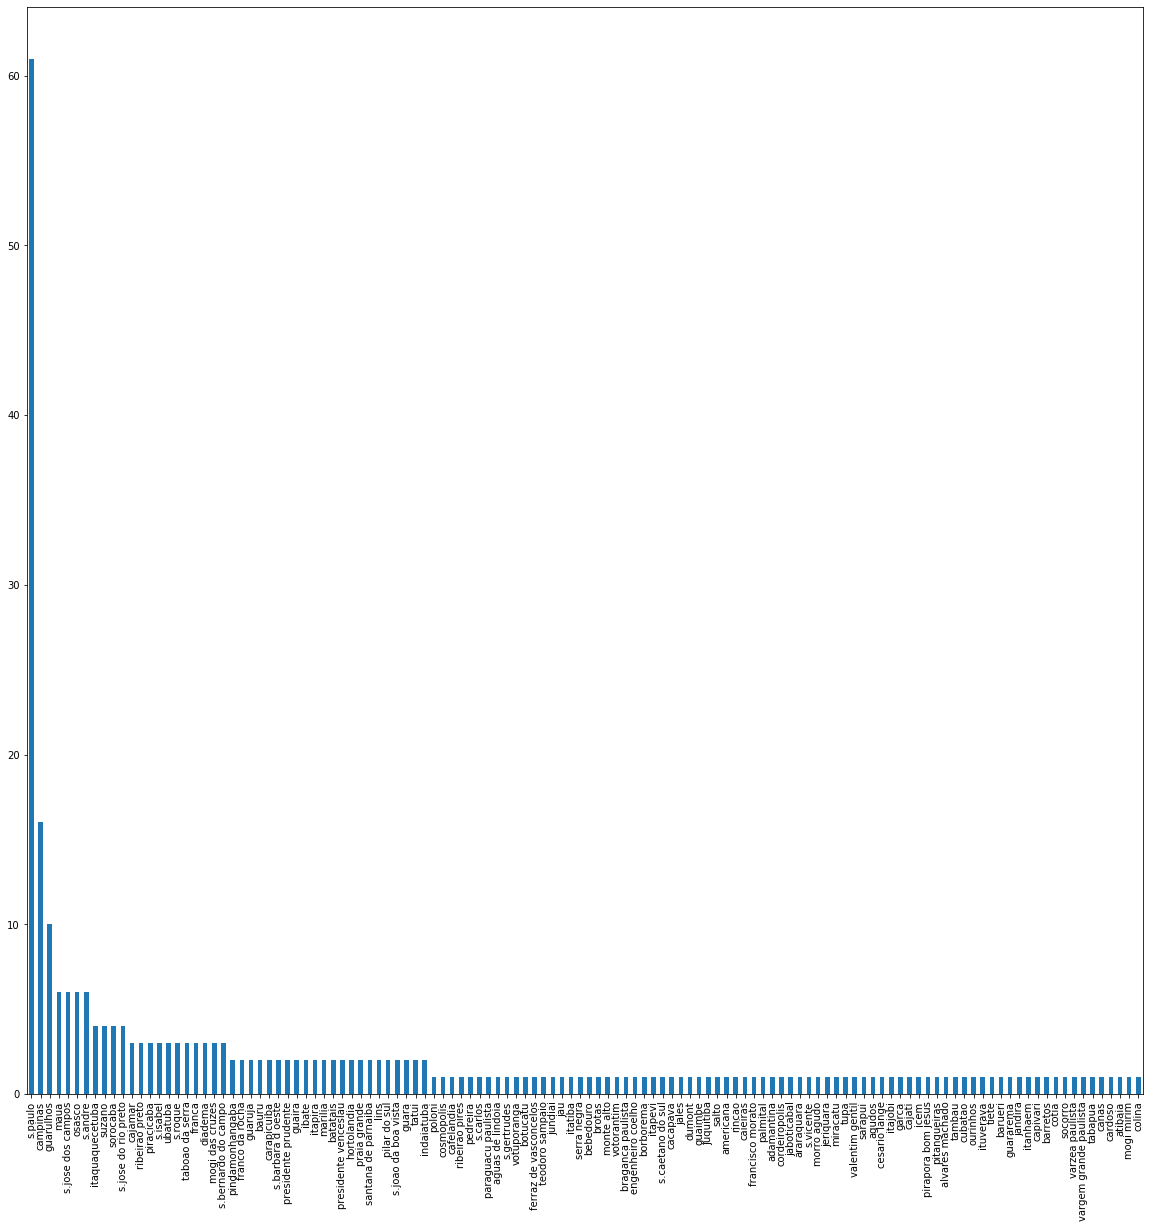

In [20]:
dfNumBo['CIDADE'].value_counts().plot(kind='bar', figsize=(20, 20));

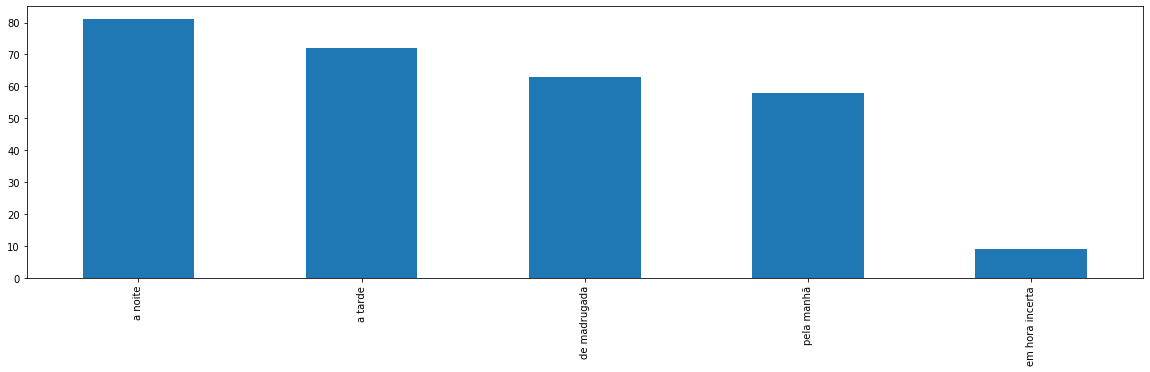

In [16]:
dfNumBo['PERIDOOCORRENCIA'].value_counts().plot(kind='bar', figsize=(20, 5));